In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

In [23]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [24]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [25]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Add Noise

In [26]:
noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


In [27]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Visualization

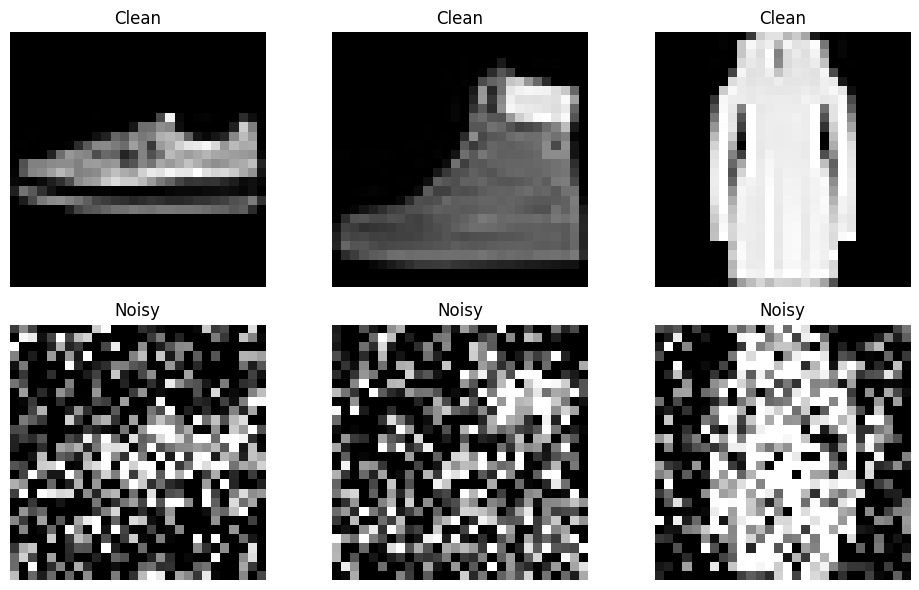

In [28]:
num_samples = 3
indices = np.random.choice(len(x_train), num_samples, replace=False)
clean_images = x_train[indices]
noisy_images = x_train_noisy[indices]

plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(clean_images[i], cmap='gray')
    plt.title("Clean")
    plt.axis('off')
    
    plt.subplot(2, num_samples, i + num_samples + 1)
    plt.imshow(noisy_images[i], cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Denoising Autoencoder Model

In [29]:
input_image = Input(shape=(28,28,1))

# Encoder

In [30]:
x = Conv2D(32, (3,3), activation='relu', padding='same')(input_image)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same', )(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2,2), padding='same')(x)


# Decoder

In [31]:
x = Conv2D(32, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Model

In [32]:
autoencoder = Model(input_image, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,601 (146.88 KB)

 Trainable params: 37,601 (146.88 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Autoencoder

In [33]:
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=30,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)


Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.3790 - val_loss: 0.3105
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3061 - val_loss: 0.3040
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3012 - val_loss: 0.3016
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2997 - val_loss: 0.3002
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2971 - val_loss: 0.2983
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2958 - val_loss: 0.2972
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2946 - val_loss: 0.2963
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2933 - val_loss: 0.2955
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2926 - val_loss: 0.2948
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2923 - val_loss: 0.2941
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2917 - val_loss: 0.2935
Epoch 12/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


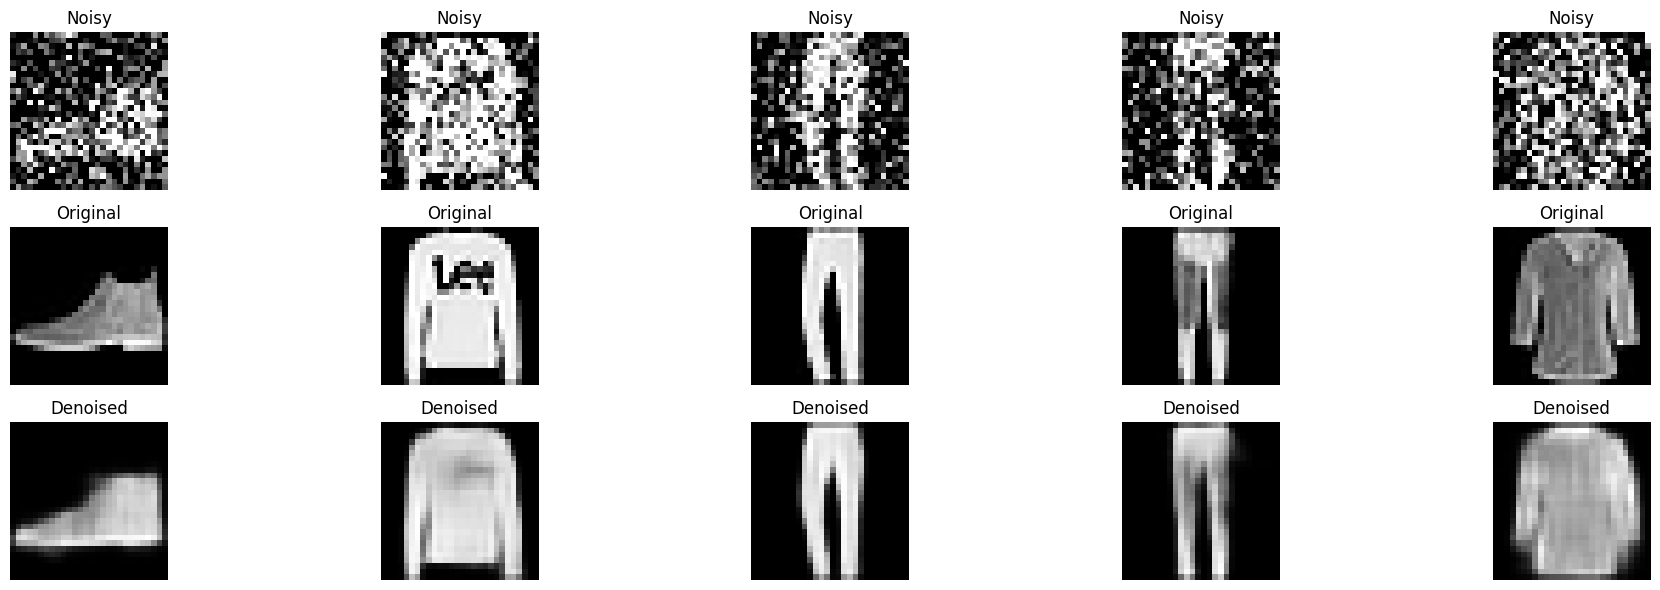

In [34]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 5
plt.figure(figsize=(20, 6))

for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

plt.tight_layout()
plt.show()


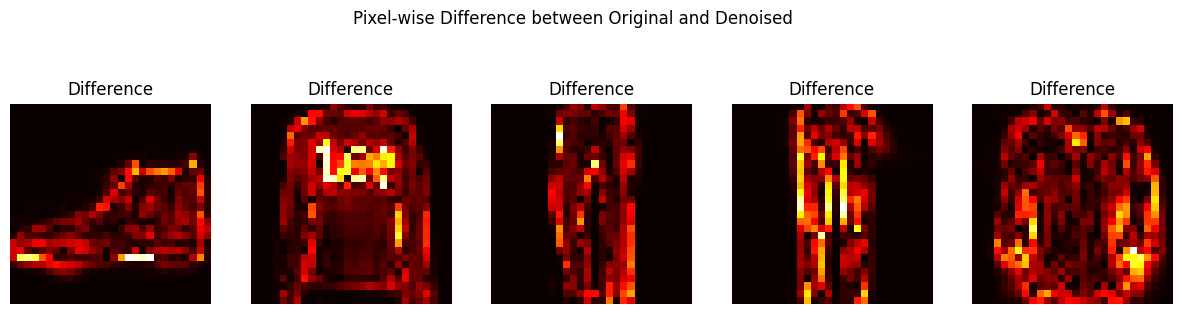

In [37]:
n = 5
plt.figure(figsize=(15, 4))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    diff = np.abs(x_test[i].squeeze() - decoded_imgs[i].squeeze())
    plt.imshow(diff, cmap='hot')
    plt.title("Difference")
    plt.axis('off')
plt.suptitle("Pixel-wise Difference between Original and Denoised")
plt.show()
